In [1]:
import os

import numpy as np
from matplotlib.image import imread

import ultraplot as uplt

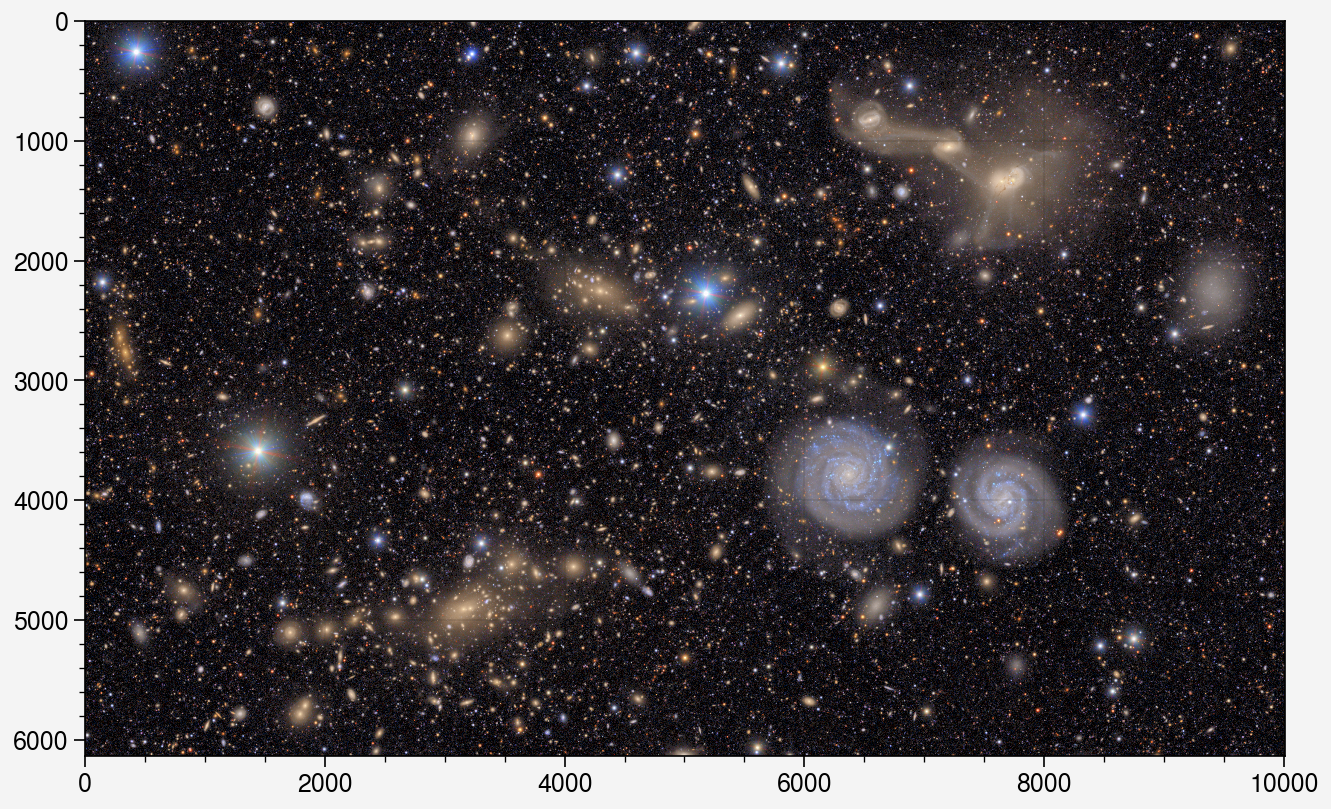

In [2]:
im = imread(os.path.expanduser("~/Downloads/IMG_0935-1536x1024.jpg"))
im = imread(os.path.expanduser("~/Downloads/im3crop2.tif"))

fig, axs = uplt.subplots(refwidth=6)
axs.imshow(im)

bwim_tot = im.sum(axis=2)
bwim_tot = bwim_tot / np.max(bwim_tot)

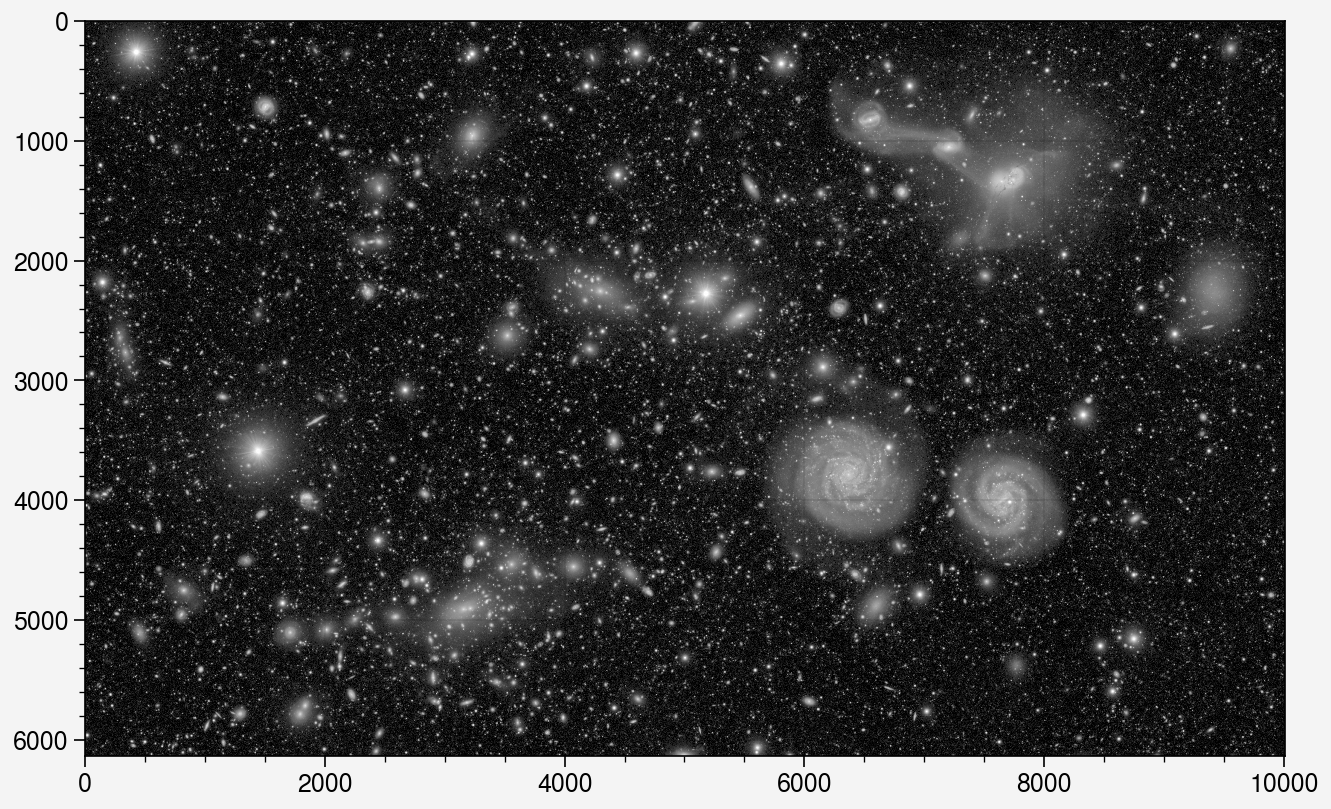

In [3]:
fig, axs = uplt.subplots(refwidth=6)
axs.imshow(bwim_tot, cmap="grey");

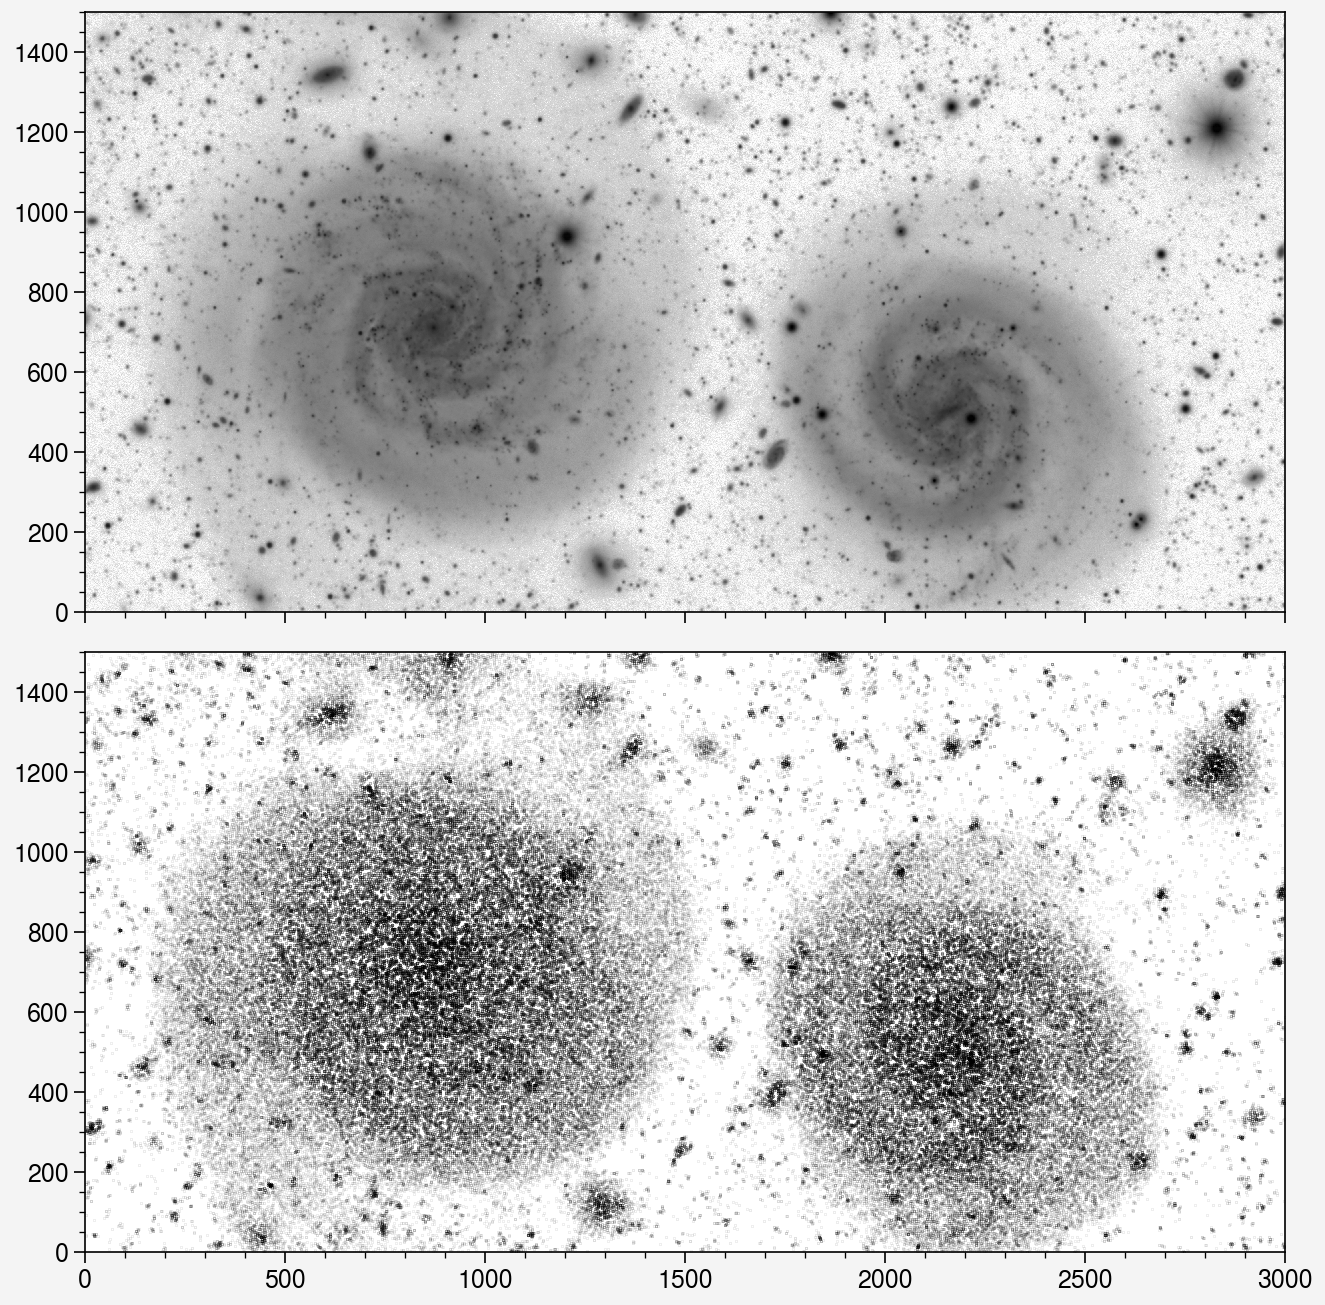

In [18]:
bwim = bwim_tot[:2048, -4096:-1024]
bwim = bwim_tot[4000:5500, 1500:5000]
bwim = bwim_tot[3000:4500, 5500:8500]
bwim /= bwim.max()

fig, axs = uplt.subplots(refwidth=6, refaspect=bwim.shape[1]/bwim.shape[0], nrows=2, ncols=1, share=4)

axs[0, 0].grid(False)
axs[0, 0].imshow(bwim[::-1, :], cmap="grey_r");

cut = np.percentile(bwim.ravel(), [99.999])
min_cut = np.percentile(bwim.ravel(), [40])
ms_min_cut = 0.021
rfrac = 0.04
mpow = 1.5
rng = np.random.RandomState(seed=10)

# axs[1, 0].grid(False)
# cbwim = bwim.copy()
# msk = cbwim < min_cut
# cbwim[msk] = 0
# axs[1, 0].imshow(cbwim[::-1, :], cmap="grey_r");

ax = axs[1, 0]
ax.grid(False)
for x in range(bwim.shape[1]):
    for y in range(bwim.shape[0]):
        val = bwim[y, x]
        if (rng.uniform() < rfrac and val > min_cut) or val > cut:
            ax.plot(x, bwim.shape[0] - 1 - y, color="k", marker="o", markersize=ms_min_cut * np.power(val / min_cut, mpow))

ax.format(xlim=(0, bwim.shape[1]), ylim=(0, bwim.shape[0]))